In [10]:
import pandas as pd
df=pd.read_csv("../Database/cleaned_data.csv")
df.drop_duplicates(inplace=True)
df

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,brand,extracted_specifications
0,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha,{'Number of Contents in Sales Package': 'Pack ...
1,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,FabHomeDecor,{'Installation & Demo Details': 'Installation ...
2,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,AW,"{'Ideal For': 'Women', 'Occasion': 'Casual', '..."
3,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha,{'Number of Contents in Sales Package': 'Pack ...
4,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,Sicons,"{'Pet Type': 'Dog', 'Brand': 'Sicons', 'Quanti..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-12-01 10:15:43+00:00,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,WallDesign,{'Number of Contents in Sales Package': 'Pack ...
19996,2015-12-01 10:15:43+00:00,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,Wallmantra,{'Number of Contents in Sales Package': 'Pack ...
19997,2015-12-01 10:15:43+00:00,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,Elite Collection,{'Number of Contents in Sales Package': 'Pack ...
19998,2015-12-01 10:15:43+00:00,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,Elite Collection,{'Number of Contents in Sales Package': 'Pack ...


In [11]:
# Check for missing values in all columns
missing_values = df.isnull().sum()
print(missing_values)


crawl_timestamp                0
product_url                    0
product_name                   0
product_category_tree          0
retail_price                  24
discounted_price              24
image                          3
is_FK_Advantage_product        0
description                    2
product_rating                 0
brand                       7643
extracted_specifications       0
dtype: int64


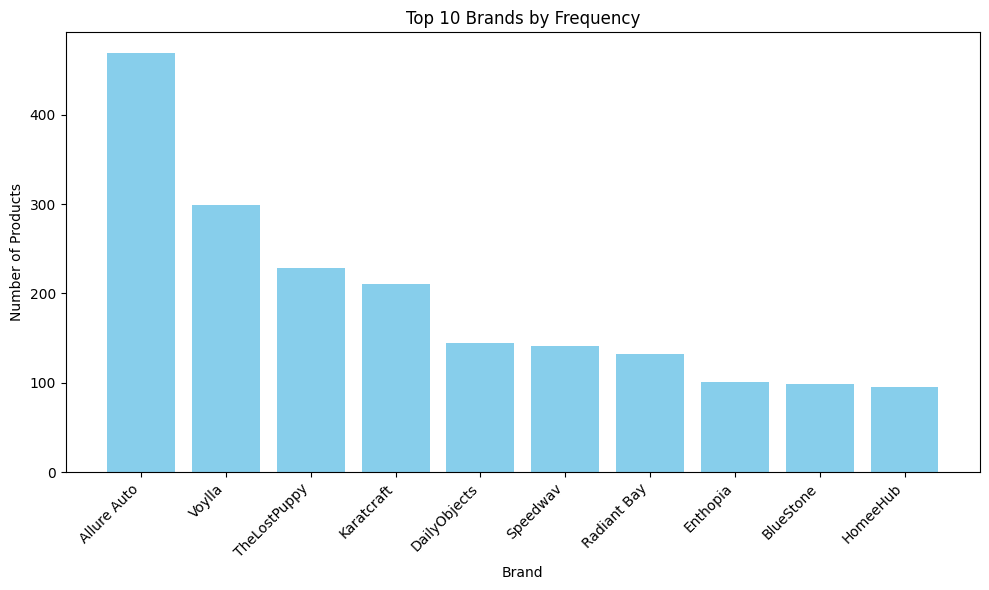

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows where 'brand' is NaN or empty
n_df = df[df['brand']!='nan']

# Count occurrences of each brand
brand_counts = n_df['brand'].value_counts()

# Select the top 10 brands
top_10_brands = brand_counts.head(10)

# Create a DataFrame for plotting
top_10_df = top_10_brands.reset_index()
top_10_df.columns = ['brand', 'count']

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_10_df['brand'], top_10_df['count'], color='skyblue')
plt.title('Top 10 Brands by Frequency')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()


In [13]:
import pandas as pd
import re

# Define a simple normalization function
def normalize_text_simple(text):
    if pd.isna(text):  # Handle NaNs
        return ''
    text = str(text)  # Convert to string
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the simplified normalization to each relevant column
df['product_name'] = df['product_name'].apply(normalize_text_simple)
df['product_category_tree'] = df['product_category_tree'].apply(normalize_text_simple)
df['description'] = df['description'].apply(normalize_text_simple)
df['brand'] = df['brand'].apply(normalize_text_simple)
df['extracted_specifications'] = df['extracted_specifications'].apply(normalize_text_simple)

# Combine the features into a single column
df['combined_features'] = df[['product_name', 'product_category_tree', 'description', 'brand', 'extracted_specifications']].agg(' '.join, axis=1)


In [14]:
df

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,brand,extracted_specifications,combined_features
0,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,alisha solid womens cycling shorts,clothing womens clothing lingerie sleep swi...,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,key features of alisha solid womens cycling sh...,No rating available,alisha,number of contents in sales package pack of 3 ...,alisha solid womens cycling shorts clothing w...
1,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,fabhomedecor fabric double sofa bed,furniture living room furniture sofa beds f...,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,fabhomedecor fabric double sofa bed finish col...,No rating available,fabhomedecor,installation demo details installation and de...,fabhomedecor fabric double sofa bed furniture ...
2,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,aw bellies,footwear womens footwear ballerinas aw bellies,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,key features of aw bellies sandals wedges heel...,No rating available,aw,ideal for women occasion casual color red oute...,aw bellies footwear womens footwear ballerin...
3,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,alisha solid womens cycling shorts,clothing womens clothing lingerie sleep swi...,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,key features of alisha solid womens cycling sh...,No rating available,alisha,number of contents in sales package pack of 2 ...,alisha solid womens cycling shorts clothing w...
4,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,sicons all purpose arnica dog shampoo,pet supplies grooming skin coat care shamp...,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,specifications of sicons all purpose arnica do...,No rating available,sicons,pet type dog brand sicons quantity 500 ml mode...,sicons all purpose arnica dog shampoo pet supp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-12-01 10:15:43+00:00,http://www.flipkart.com/walldesign-small-vinyl...,walldesign small vinyl sticker,baby care baby kids gifts stickers walldes...,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,buy walldesign small vinyl sticker for rs730 o...,No rating available,walldesign,number of contents in sales package pack of 55...,walldesign small vinyl sticker baby care baby...
19996,2015-12-01 10:15:43+00:00,http://www.flipkart.com/wallmantra-large-vinyl...,wallmantra large vinyl stickers sticker,baby care baby kids gifts stickers wallman...,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,buy wallmantra large vinyl stickers sticker fo...,No rating available,wallmantra,number of contents in sales package pack of 1 ...,wallmantra large vinyl stickers sticker baby c...
19997,2015-12-01 10:15:43+00:00,http://www.flipkart.com/elite-collection-mediu...,elite collection medium acrylic sticker,baby care baby kids gifts stickers elite c...,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,buy elite collection medium acrylic sticker fo...,No rating available,elite collection,number of contents in sales package pack of 1 ...,elite collection medium acrylic sticker baby c...
19998,2015-12-01 10:15:43+00:00,http://www.flipkart.com/elite-collection-mediu...,elite collection medium acrylic sticker,baby care baby kids gifts stickers elite c...,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,buy elite collection medium acrylic sticker fo...,No rating available,elite collection,number of contents in sales package pack of 1 ...,elite collection medium acrylic sticker baby c...


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features for efficiency

# Fit and transform the combined features
tfidf_matrix = tfidf.fit_transform(df['combined_features'])


In [16]:
# from sklearn.metrics.pairwise import cosine_similarity
# import streamlit as st

# def get_query_vector(query, vectorizer):
#     query = normalize_text_simple(query)  # Normalize the search term
#     return vectorizer.transform([query])

# def get_relevant_products(query, tfidf_matrix, vectorizer, top_n=10):
#     query_vector = get_query_vector(query, vectorizer)
#     similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()
#     top_indices = similarities.argsort()[-top_n:][::-1]  # Get indices of top_n products
#     return df.iloc[top_indices][['product_name', 'product_category_tree', 'description', 'brand', 'extracted_specifications', 'combined_features']]

# # Streamlit web interface
# st.title('Product Search System')

# query = st.text_input('Enter search term:')
# if query:
#     results = get_relevant_products(query, tfidf_matrix, tfidf)
#     st.write(results[['product_name', 'brand', 'description']])

In [17]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1170885 stored elements and shape (20000, 5000)>

In [18]:
tfidf

TfidfVectorizer(max_features=5000)